<h2>Image Classification with CNN using Keras</h2> 

<h2>Task 1: Import Liabraries</h2>

In [ ]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('Tensorflow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())
print('What are you?', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.2.0
Is using GPU? True
What are you? [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


<h2>Task 2: Preprocess Data</h2>

In [ ]:
def get_three_classes(x,y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)
    
    indices = np.concatenate([indices_0, indices_1, indices_2], axis = 0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace = False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


<h2>Task 3: Visualize Examples</h2>

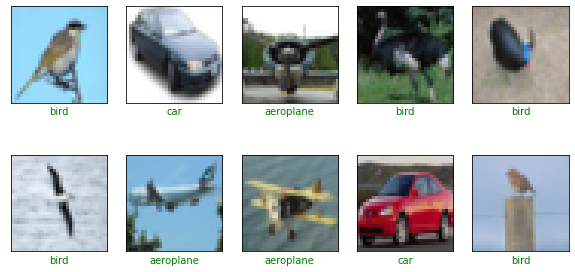

In [ ]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples (x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace = False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize = (10, 5))
    for i in range(10):
        plt.subplot(2, 5, 1 + i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color = col)
        
    plt.show()
    
show_random_examples(x_train, y_train, y_train)

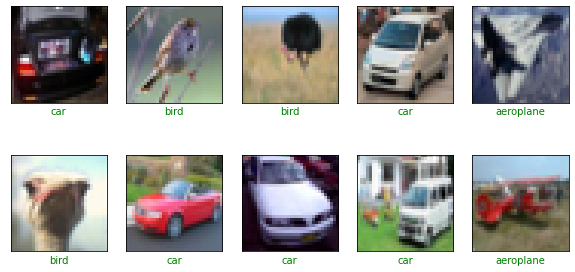

In [ ]:
show_random_examples(x_test, y_test, y_test)

<h2>Task 4: Create Model</h2>

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation = 'relu', padding = 'same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation = 'relu'))
        model.add(MaxPooling2D(pool_size = 2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape = (32, 32, 3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

model = create_model()
model.summary()    

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 15, 15, 64)       

<h2>Task 5: Train the Model

In [ ]:
h = model.fit(
    x_train/255., y_train,
    validation_data = (x_test/255., y_test),
    epochs = 10,
    batch_size =128,
    callbacks = [
                 tf.keras.callbacks.EarlyStopping(monitor= 'val_accuracy', patience= 3),
                 tf.keras.callbacks.ModelCheckpoint(
                     'models/model_{val_accuracy:.3f}.h5',
                     save_best_only =True,
                     save_weights_only = False,
                     monitor = 'val_accuracy'
                     )
    ]
)

Epoch 1/10
118/118 [==============================] - 2s 16ms/step - loss: 0.8393 - accuracy: 0.6906 - val_loss: 3.1884 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 2s 14ms/step - loss: 0.5507 - accuracy: 0.7780 - val_loss: 2.6996 - val_accuracy: 0.4773
Epoch 3/10
118/118 [==============================] - 2s 14ms/step - loss: 0.4967 - accuracy: 0.7998 - val_loss: 2.9849 - val_accuracy: 0.3880
Epoch 4/10
118/118 [==============================] - 2s 14ms/step - loss: 0.4462 - accuracy: 0.8235 - val_loss: 1.8262 - val_accuracy: 0.4633
Epoch 5/10
118/118 [==============================] - 2s 14ms/step - loss: 0.4185 - accuracy: 0.8347 - val_loss: 1.4560 - val_accuracy: 0.5710
Epoch 6/10
118/118 [==============================] - 2s 14ms/step - loss: 0.3902 - accuracy: 0.8471 - val_loss: 0.3662 - val_accuracy: 0.8583
Epoch 7/10
118/118 [==============================] - 2s 14ms/step - loss: 0.3608 - accuracy: 0.8575 - val_loss: 0.4187 - val_accuracy: 0.8337

<h2>Task 6: Final Predictions<?h2>

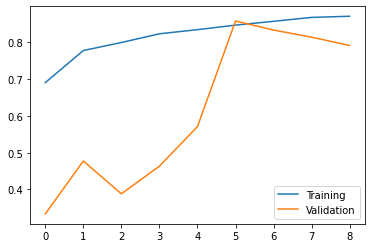

In [ ]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label = 'Training')
plt.plot(range(len(accs)), val_accs, label = 'Validation')
plt.legend()
plt.show()

In [ ]:
model = tf.keras.models.load_model('models/model_0.858.h5')

In [ ]:
preds = model.predict(x_test/255.)

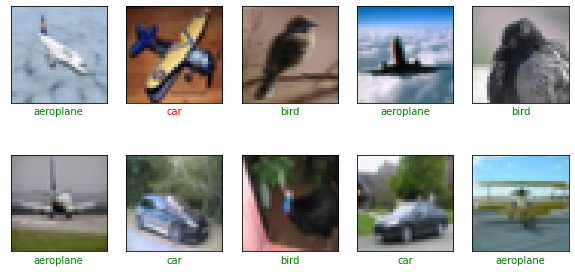

In [ ]:
show_random_examples(x_test, y_test, preds)